In [1]:
%load_ext autoreload
%autoreload 2
from optical_traps import *
from optical_traps.consts import c, k_B, h_bar, u
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('https://git.io/JeBAy')
%config InlineBackend.figure_format = 'retina'

In [2]:
SAVEFIGS = False

In [27]:
main_trans = Transition(wavelength=398.911*1e-9, scattering_rate=2*np.pi*29.13*1e6) #1S0=->1P1

lat_beam_1 = LaserBeam(wavelength=760*1e-9,power=1, waist_x=50*1e-6, angle=1.5*np.pi/180)
lat_beam_2 = LaserBeam(wavelength=lat_beam_1.wavelength, power=lat_beam_1.power, waist_x=lat_beam_1.waist_x, angle=-lat_beam_1.angle)

odt_beam_1 = LaserBeam(wavelength=1064*1e-9, power=4, waist_x=30*1e-6, angle=90*np.pi/180)
odt_beam_2 = LaserBeam(wavelength=odt_beam_1.wavelength, power=4, waist_x=odt_beam_1.waist_x, angle=0*np.pi/180)

In [28]:
crossed_odt = TwoBeamDipoleTrap(odt_beam_1, odt_beam_2)
odt_omegas, odt_omega_bar, odt_trap_depth = crossed_odt.calc_trap_params(main_trans)
print('ODT Trap frequencies:', np.array(odt_omegas)/2/np.pi, 'Hz')
print('ODT Trap depth:', odt_trap_depth/k_B*1e6, 'uK')

ODT Trap frequencies: [634.31360962 897.0263284  634.31360962] Hz
ODT Trap depth: 148.71839987895896 uK


In [29]:
accordion_lattice = AccordionLattice(lat_beam_1, lat_beam_2)

#fermi_gas = NonIntFermiGas.from_single_beam(trap_beam=odt_beam_1, transition=main_trans, N_atoms=1e6, T_atoms=20*1e-6)

fermi_gas = NonIntFermiGas(trap_freqs=odt_omegas, transition=main_trans, N_atoms=1e6, T_atoms=20*1e-6)

ODT Trap Frequencies:
	 x-dir: 634.31 Hz
	 y-dir: 897.03 Hz
	 z-dir: 634.31 Hz
	 mean:  711.99 Hz
Fermi energy: E_F = h * 129.0 kHz
Fermi temperature: T_F = 6209.09 nK
Reduced temperature: T/T_F = 3.22
Fugacity: z = 0.004990137792266438
Chemical potential: mu = -17.07 E_F
Total energy: E_tot = 1250586.0 MHz
Total entropy S_tot = 9301537.61 k_B


In [30]:
lat_omegas, lat_omega_bar, lat_trap_depth = accordion_lattice.calc_trap_params(main_trans)
print('Accordion Trap frequencies:', np.array(lat_omegas)/2/np.pi, 'Hz')
print('Accordion Trap depth:', lat_trap_depth/k_B*1e6, 'uK')

Accordion Trap frequencies: [1919.07498245  248.70316997    6.56561873] Hz
Accordion Trap depth: 31.755171656417815 uK


**Plot Accordion Lattice Shape**

Lattice site centers in x-direction at: [-71.3 -57.3 -42.8 -28.8 -14.3   0.3  14.3  28.8  42.8  57.3  71.3] um


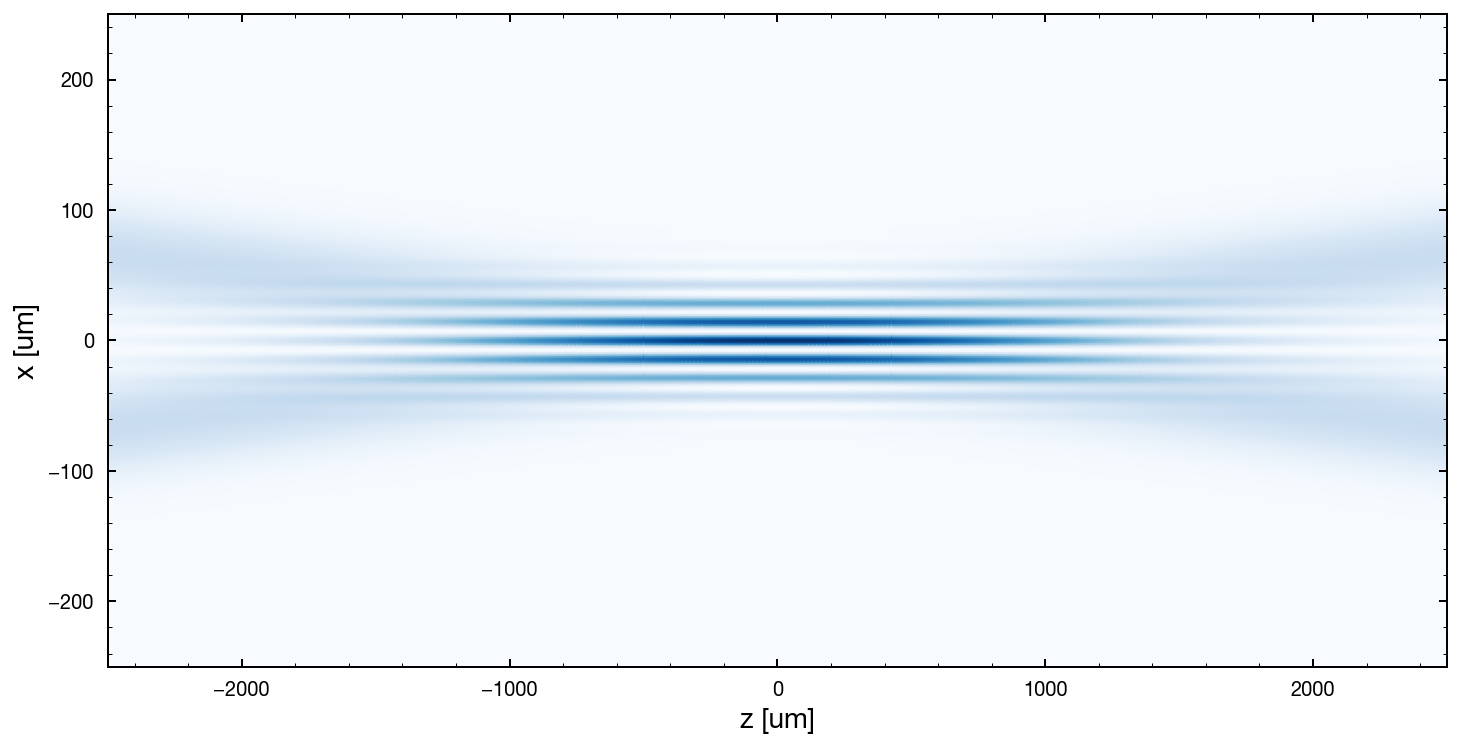

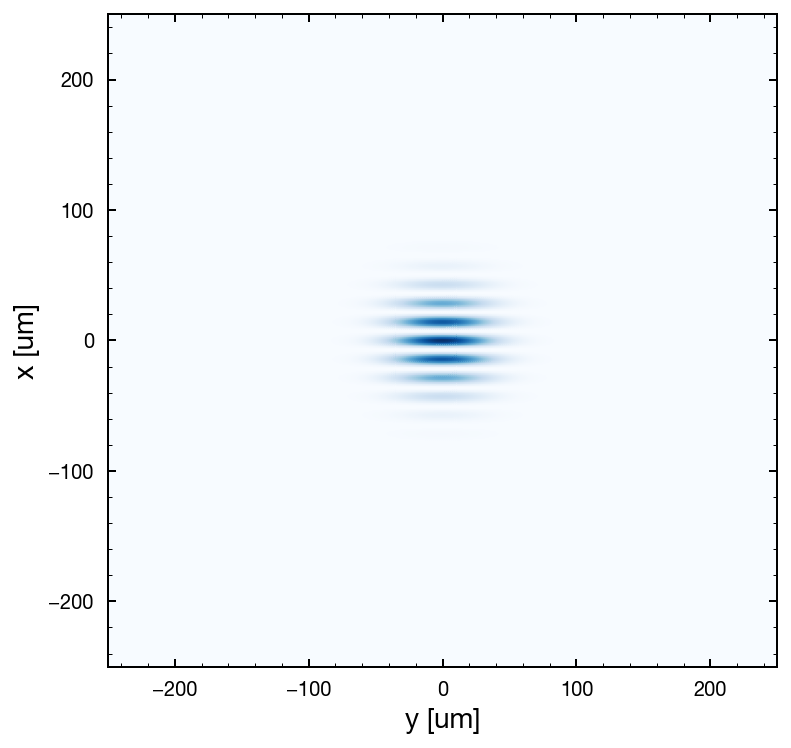

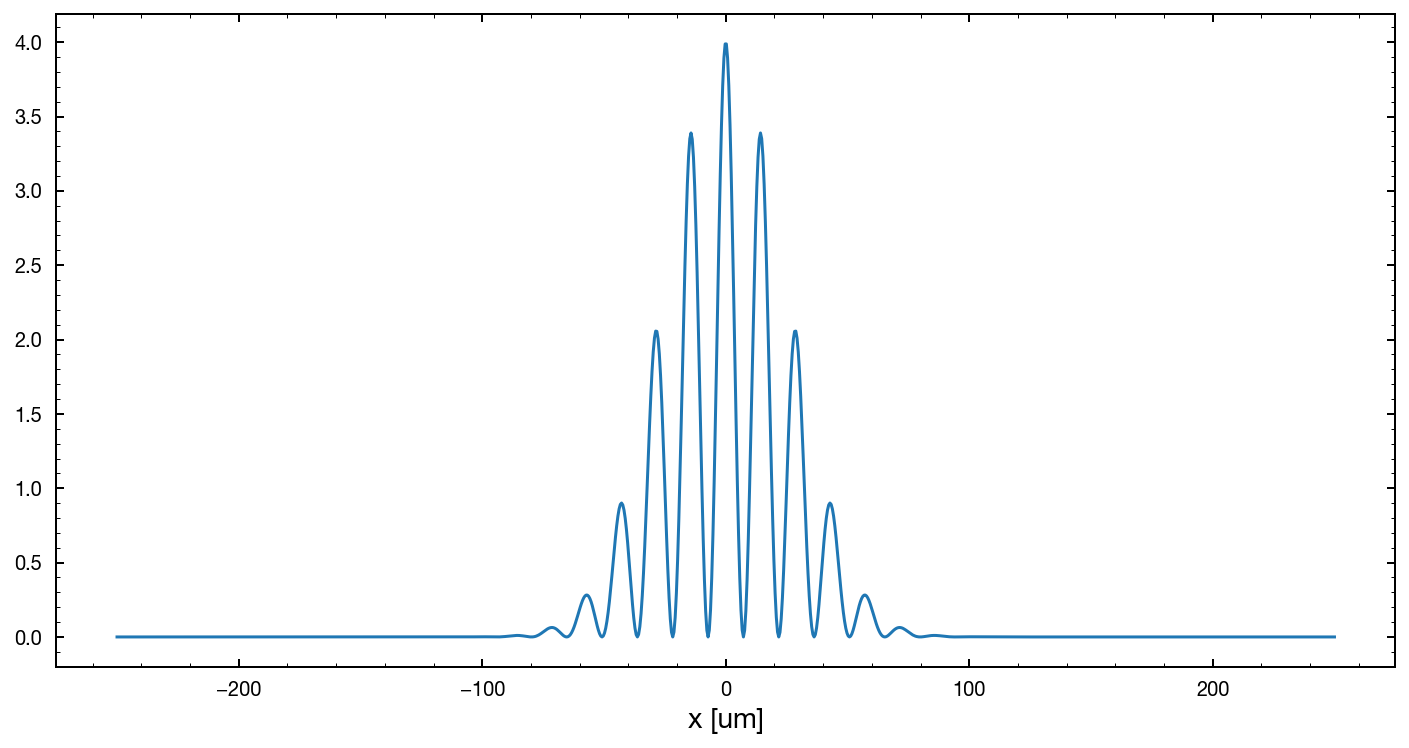

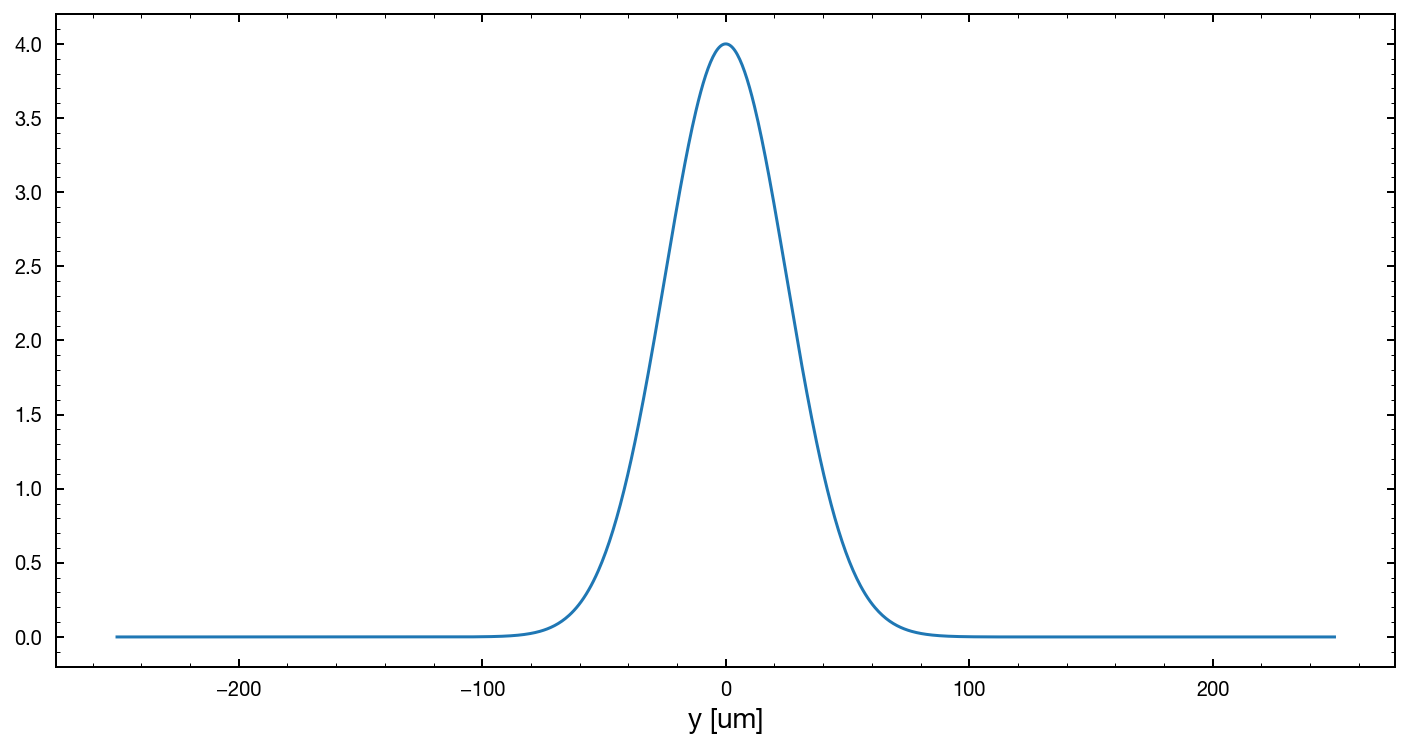

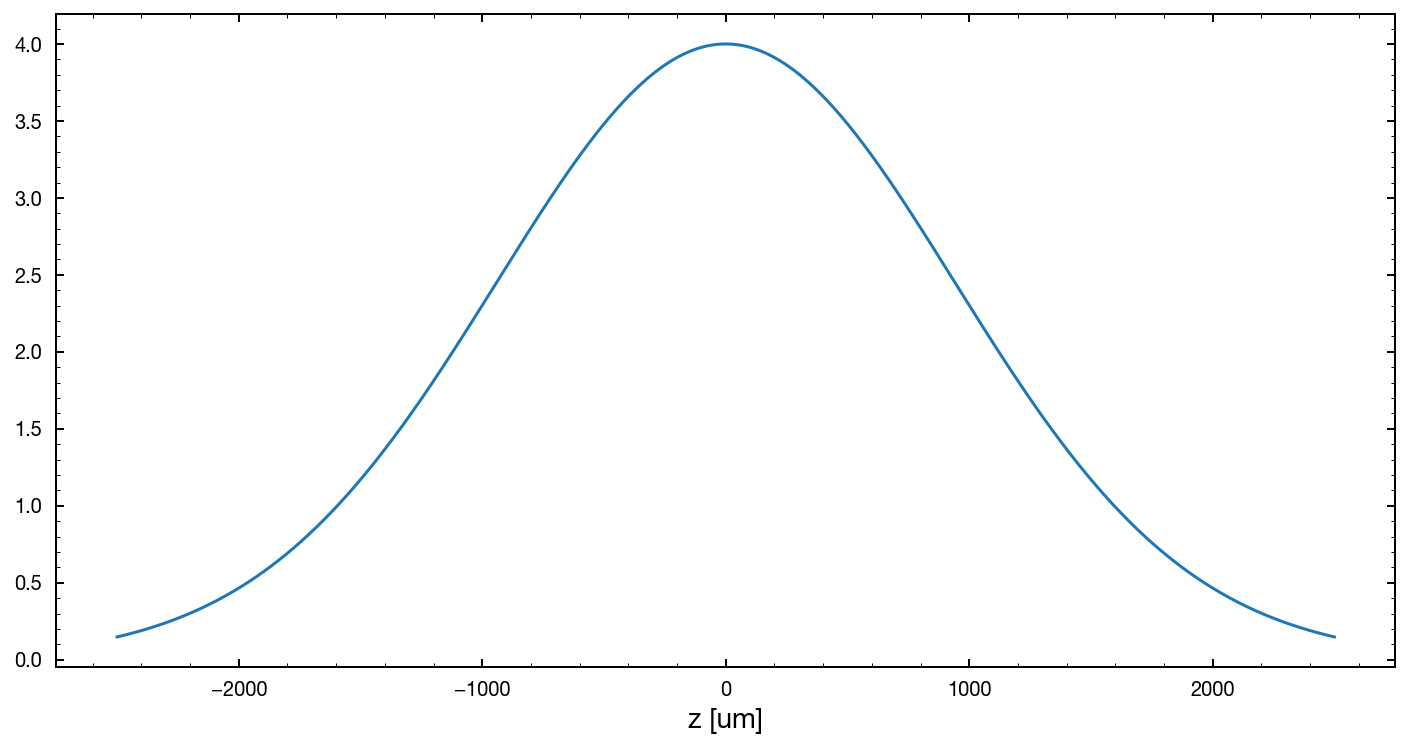

In [31]:
x = np.linspace(-250e-6,250e-6,1000)
y = np.linspace(-250e-6,250e-6,1000)
z = np.linspace(-2500e-6,2500e-6,1000)
X, Z = np.meshgrid(x, z)
XX, YY = np.meshgrid(x, y)

### PLOT 2D Cross Sections of Lattice ###

lattice_2d_xz = accordion_lattice.intensity_dist(X, 0, Z)

lattice_2d_xy = accordion_lattice.intensity_dist(XX, YY, 0)

fig, ax = plt.subplots(figsize=(12,6))
im = ax.pcolormesh(Z*1e6,X*1e6, lattice_2d_xz ,cmap=plt.cm.Blues)
ax.set_xlabel('z [um]')
ax.set_ylabel('x [um]')
if SAVEFIGS: plt.savefig('accordion_xz.pdf')

fig, ax = plt.subplots(figsize=(6,6))
im = ax.pcolormesh(YY*1e6,XX*1e6, lattice_2d_xy ,cmap=plt.cm.Blues)
ax.set_xlabel('y [um]')
ax.set_ylabel('x [um]')
if SAVEFIGS: plt.savefig('accordion_xy.png')
    
### PLOT 1D Cross Sections of Lattice ###

lattice_csect_x = accordion_lattice.intensity_dist(x, 0, 1e-99)
lattice_csect_y = accordion_lattice.intensity_dist(0, y, 1e-99)
lattice_csect_z = accordion_lattice.intensity_dist(0, 0, z)

peaks, _ = find_peaks(lattice_csect_x,height=0.005*lattice_csect_x[int(len(lattice_csect_x)/2)])
site_centers = x[peaks]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x*1e6, lattice_csect_x)
ax.set_xlabel('x [um]')
if SAVEFIGS: plt.savefig('accordion_x.png')
    
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(y*1e6, lattice_csect_y)
ax.set_xlabel('y [um]')
if SAVEFIGS: plt.savefig('accordion_y.png')

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(z*1e6, lattice_csect_z)
ax.set_xlabel('z [um]')
if SAVEFIGS: plt.savefig('accordion_z.png')

print('Lattice site centers in x-direction at:', (site_centers*1e6).round(1),'um')
#plt.tight_layout()
plt.show()

**Shape of Fermi Gas in ODT**

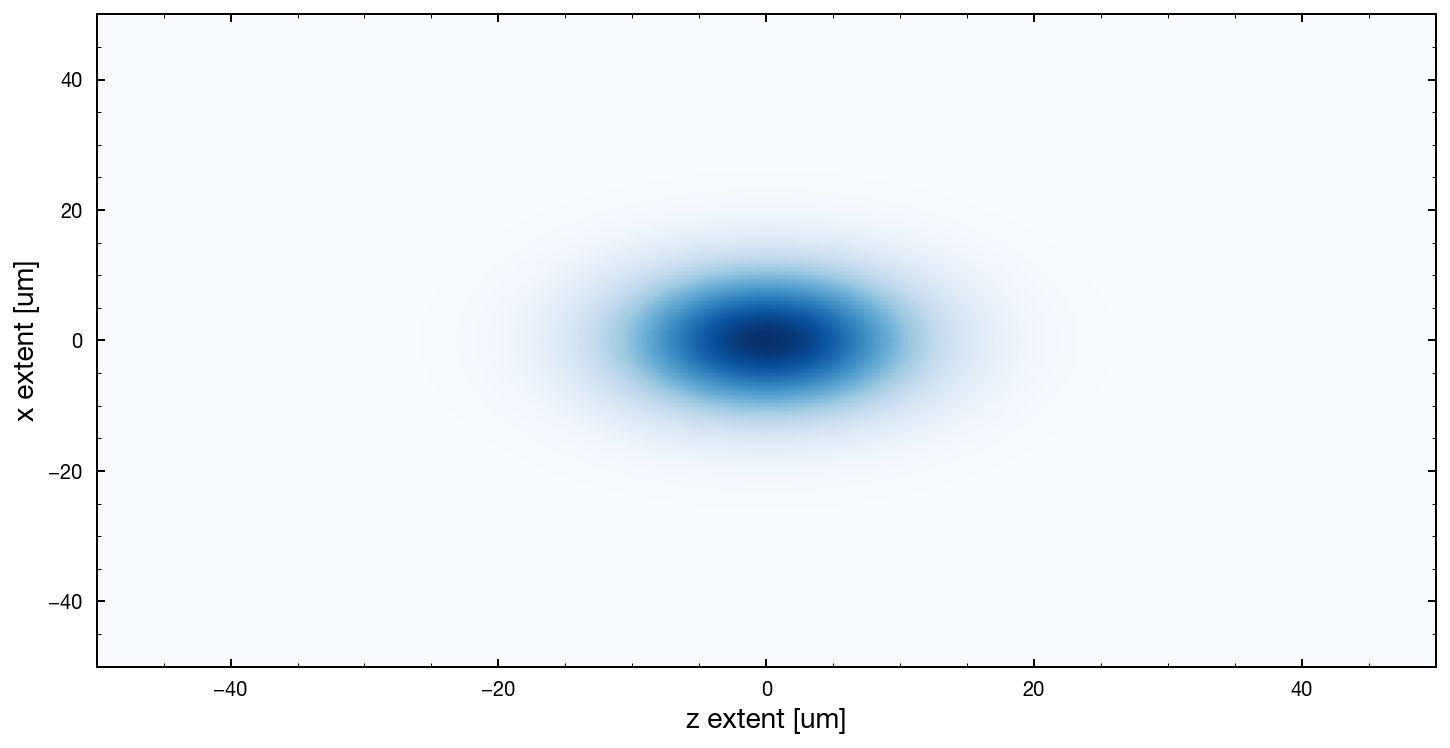

In [32]:
x=np.linspace(-50*1e-6,50*1e-6,500)
z=np.linspace(-50*1e-6,50*1e-6,500)
X,Z = np.meshgrid(x, z)

density_dist = fermi_gas.density_distribution(X.flatten(), 0, Z.flatten()).reshape(X.shape)

fig, ax = plt.subplots(figsize=(12,6))
im = ax.pcolormesh(Z*1e6,X*1e6, density_dist,cmap=plt.cm.Blues)
ax.set_xlabel(r'z extent [um]')
ax.set_ylabel(r'x extent [um]')
if SAVEFIGS: plt.savefig('odt_fermigas_xz.png')
plt.show()

**Overlap of Lattice and Fermi Gas in ODT**

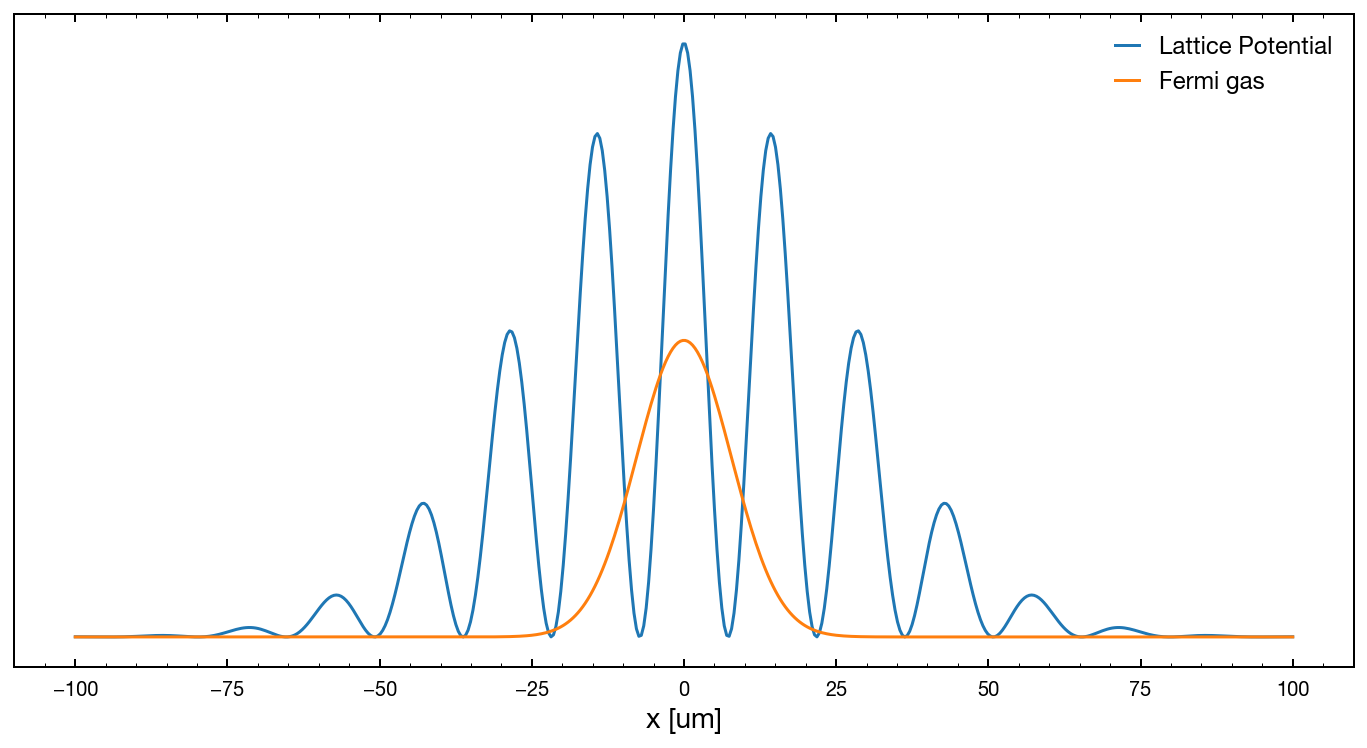

In [33]:
x=np.linspace(-100*1e-6,100*1e-6,500)
lattice_csect_x = accordion_lattice.intensity_dist(x, 0, 1e-99)
cloud_csect_x = fermi_gas.density_distribution(x, 0, 0)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x*1e6, lattice_csect_x/max(lattice_csect_x), label=r'Lattice Potential')
ax.plot(x*1e6, cloud_csect_x/max(cloud_csect_x)/2, label=r'Fermi gas')
ax.set_xlabel('x [um]')
ax.set_yticks([])
ax.legend()
if SAVEFIGS: plt.savefig('lattice_gas_overlap_x.png')
plt.show()

[7.74334945e-84 1.04438283e-51 8.31847529e-27 5.85094527e-09
 2.72647232e+02 9.99454706e+05 2.72647232e+02 5.85094527e-09
 8.31847529e-27 1.04438283e-51 7.74334945e-84]


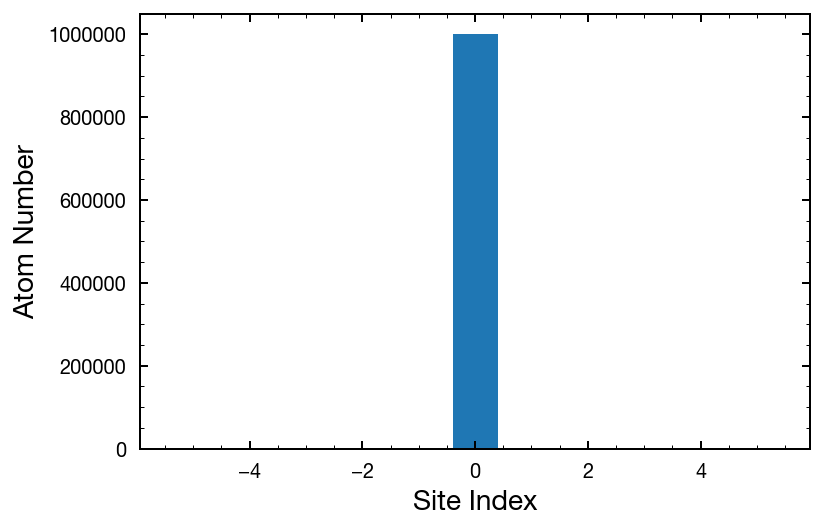

In [34]:
site_centers = accordion_lattice.get_site_centers()

model = LatticeLoadingModel(fermi_gas, lat_omega_bar, site_centers)

N_loc_opt, S_tot_loc_opt, T_red_loc_opt = model.calculate_final_dist()
print(N_loc_opt)
fig, ax = plt.subplots()
ax.bar(range(-int(len(site_centers)/2), int(len(site_centers)/2)+1), N_loc_opt)
ax.set_ylabel('Atom Number')
ax.set_xlabel('Site Index')
if SAVEFIGS: plt.savefig('number_distribution_sites.png')
plt.show()